# Linear Regression (선형회귀)

## Example of one feature (x1)

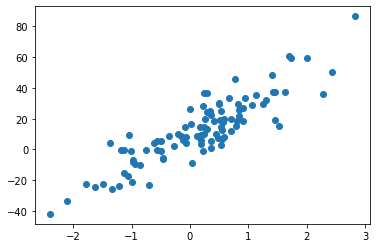

In [18]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [19]:
# --------
w=np.random.randn()   
b=np.random.randn()

lr = 0.1          # learning rate
n_epoch = 100
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* ((y_pred - y)*x).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)
        
print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 637.6102573036046 w= 0.8861880180693382 b= 2.7690019553612597
epoch= 10 loss= 153.24451457149402 w= 13.112214529133201 b= 8.39895770856393
epoch= 20 loss= 107.24379657320156 w= 17.121526059425083 b= 9.564200256900454
epoch= 30 loss= 102.39792473298003 w= 18.48258819362012 b= 9.704874081390287
epoch= 40 loss= 101.81175179358725 w= 18.96195704811154 b= 9.662256501376566
epoch= 50 loss= 101.73002090058144 w= 19.137054818574533 b= 9.614570384923539
epoch= 60 loss= 101.71727673050079 w= 19.203195024101444 b= 9.58576442353792
epoch= 70 loss= 101.7151438607218 w= 19.22891183943034 b= 9.571056721943387
epoch= 80 loss= 101.71477282574146 w= 19.239149464742844 b= 9.564094536863262
epoch= 90 loss= 101.71470701309364 w= 19.24330020870849 b= 9.560930407050867
---------------------------
epoch= 99 loss= 101.71469571314348 w= 19.244895154120258 b= 9.55962074860268


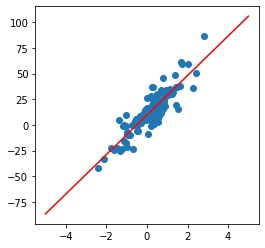

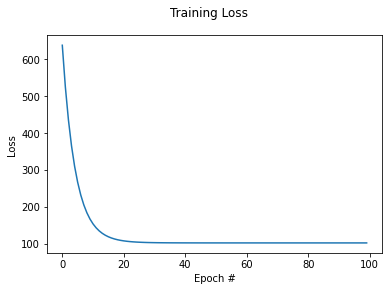

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-5,5,100) 
yy = w * xx + b
plt.plot(xx,yy,c='r') 
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Training two features (x1, x2)

In [21]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)             # randn=normal distribution in (-1,1), rand=(0,1)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.2                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 431.88871530373524 w1= 32.01 w2= 39.28 b= 50.22


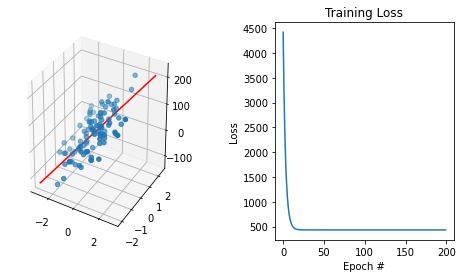

In [22]:
plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Using regression function (LinearRegression)

In [23]:
# ex3: using regression function (LinearRegression)

from sklearn.linear_model import LinearRegression

X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

model = LinearRegression()        # create model
model.fit(X,y)                    # train model

print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)

# prediction
new_X=[1,3]
print(model.predict([new_X])) 
#----
z = np.random.rand(10,2)
model.predict(z)

score:  0.852096457119329
w1= 32.01077060996754 w2= 39.28470654505595 b= 50.224299019183114
[200.08918926]


array([ 94.83958273,  89.92895478,  89.52727555,  94.32280399,
        67.53623475,  85.55815403,  57.88607961, 108.28377258,
        60.70286476,  75.15638225])

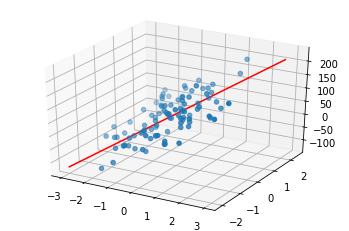

In [24]:
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

## Use make_regression

In [8]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=2000, n_features=2, noise=1.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.77111241 176.82634938  55.25266631 -79.36653137 -41.50945283]


In [9]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9996931455705321

# Classification (선형분류)

## Linear classification (use Cross Entropy as loss function)
- also called log loss (logistic regression)
- Logistic Regression
- Classification by Calculating parameters one by one

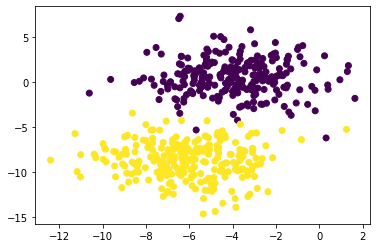

In [25]:
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [26]:
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [27]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn() 

def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))

lossHistory = []
epochs = 300
alpha = 0.01

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction

    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)
    
    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1
    
    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

0.4607624470789543 -0.7440556182824005 0.25033942708415835
0.938


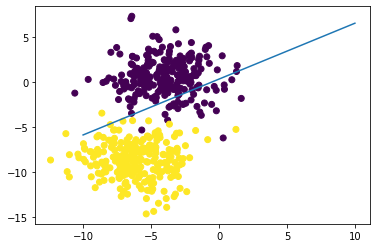

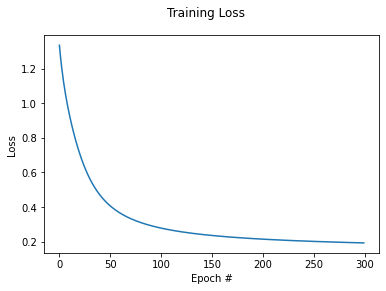

In [28]:
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-10,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Use library function: SGDClassifier()
- default: hinge loss (used in SVM)

In [29]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)

SGDClassifier:  0.984
[[ -9.00580238 -38.65467582]] [-228.56930048]
Logistic Regression:  0.994
[[-0.46621709 -1.9549905 ]] [-10.32380395]


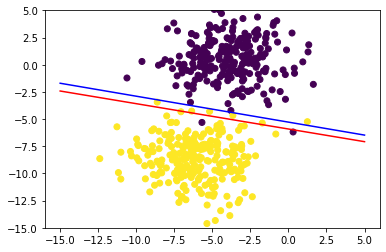

In [33]:
clf = SGDClassifier()      
clf.fit(X[:,:2], y)    
print("SGDClassifier: ", clf.score(X[:, :2],y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()      
log.fit(X[:,:2], y)    
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')

## Hinge Loss
- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
- Himge loss for input-output pair (x,y) is given as:
- L = max(0, 1 - yf(x))
- L = 0 (if y*f(x) >= 1), 1-y*f(x) (otherwise)
- dL/dw1 = 0 (if y*f(x) >= 1), -y*x1 (otherwise)
      

In [45]:
N = 500
(X, y_org) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
y = y_org.copy()
y[y==0] = -1
X[:5], y[:5], y_org[:5]

(array([[ -5.48619226,   1.21306671],
        [ -2.89056798,  -9.18025054],
        [ -1.5288614 ,   1.01129561],
        [ -7.48266658,  -9.99569036],
        [ -7.03983988, -10.35802726]]),
 array([-1,  1, -1,  1,  1]),
 array([0, 1, 0, 1, 1]))

0.31220791716011737 -0.6296150081995096 -0.52136547173199
0.952


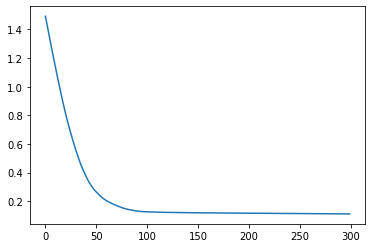

In [46]:
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()
lossHistory = []
epochs = 300
alpha = 0.01

N = len(x1)
for epoch in np.arange(epochs):

    w1_deriv, w2_deriv, b_deriv, loss = 0., 0., 0., 0.
    for i in range(N):
        score = y[i]*(w1*x1[i] + w2*x2[i] + b)
        if score <= 1:
            w1_deriv = w1_deriv - x1[i]*y[i]
            w2_deriv = w2_deriv - x2[i]*y[i]
            b_deriv = b_deriv - y[i]
            loss = loss + (1 - score)
        # else : derivatives are zero. loss is 0
    w1_deriv /= float(N)      # mean
    w2_deriv /= float(N)
    b_deriv  /= float(N)
    loss /= float(N)

    w1 = w1 - alpha * w1_deriv
    w2 = w2 - alpha * w2_deriv
    b  =  b - alpha *  b_deriv

    lossHistory.append(loss)
    
print(w1, w2, b)

accuracy = ((w1*x1 + w2*x2 + b > 0) == y_org).sum()/N
print(accuracy)
plt.plot(lossHistory)

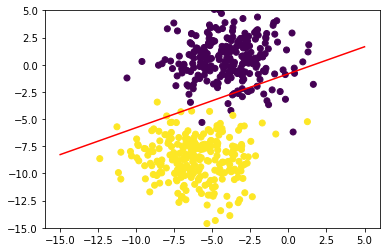

In [47]:
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

# Exercise